In [4]:
!pip install torchcam

In [5]:
import os 
import tempfile
root_dir = tempfile.mkdtemp()
print(root_dir)
data_root_dir = os.path.join(root_dir, "data")
os.makedirs(data_root_dir)
img_path = data_root_dir + "/swan.jpg"
!curl "https://cdn.pixabay.com/photo/2018/04/07/20/32/swan-3299528_1280.jpg" --output {img_path}

/var/tmp/tmpq9x_b92r
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  210k  100  210k    0     0  2509k      0 --:--:-- --:--:-- --:--:-- 2509k


In [6]:
from torchvision.io.image import read_image
from torchvision.transforms.functional import normalize, resize, to_pil_image
from torchvision.models import resnet18
from torchcam.methods import CAM
from torchvision import transforms
import torch
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

def preprocess_image(img_path):
    preprocess = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])
    img = Image.open(img_path).convert('RGB')
    img_tensor = preprocess(img).unsqueeze(0)
    return img_tensor

model = resnet18(pretrained=True).eval()
# Get your input
img = preprocess_image(img_path)

cam = CAM(model, 'layer4', 'fc')
with torch.no_grad(): 
    out = model(img)
    map = cam(class_idx=243)


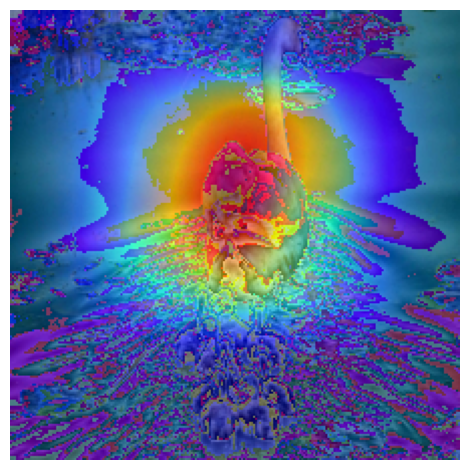

In [7]:
from torchcam.utils import overlay_mask
from torchvision.transforms.functional import normalize, resize, to_pil_image

# Resize the CAM and overlay it
result = overlay_mask(to_pil_image(img[0]), to_pil_image(map[0].squeeze(0), mode='F'), alpha=0.5)
# Display it
plt.imshow(result); plt.axis('off'); plt.tight_layout(); plt.show()